In [1]:
from tinyai import *

import pickle,gzip,math,os,time,shutil,random,logging,torch
import fastcore.all as fc,matplotlib as mpl,numpy as np,matplotlib.pyplot as plt
from collections.abc import Mapping
from pathlib import Path
from functools import partial

import timm
import einops
from fastcore.foundation import L
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as TF,torch.nn.functional as F
from torch import tensor,nn,optim,Tensor
from torch.utils.data import DataLoader,default_collate
from torch.nn import init
from torch.optim import lr_scheduler
from torcheval import metrics

set_output()

In [2]:
from torcheval import metrics
from datasets import load_dataset_builder, load_dataset

In [7]:
xl, yl = 'img', 'label'
name = 'cifar10'

dsd = load_dataset(name)

@inplace
def transformi(b): b[xl] = [TF.to_tensor(o)-0.5 for o in b[xl]]

bs = 32
tds = dsd.with_transform(transformi)
dls = DataLoaders.from_dd(tds, bs, num_workers=8)

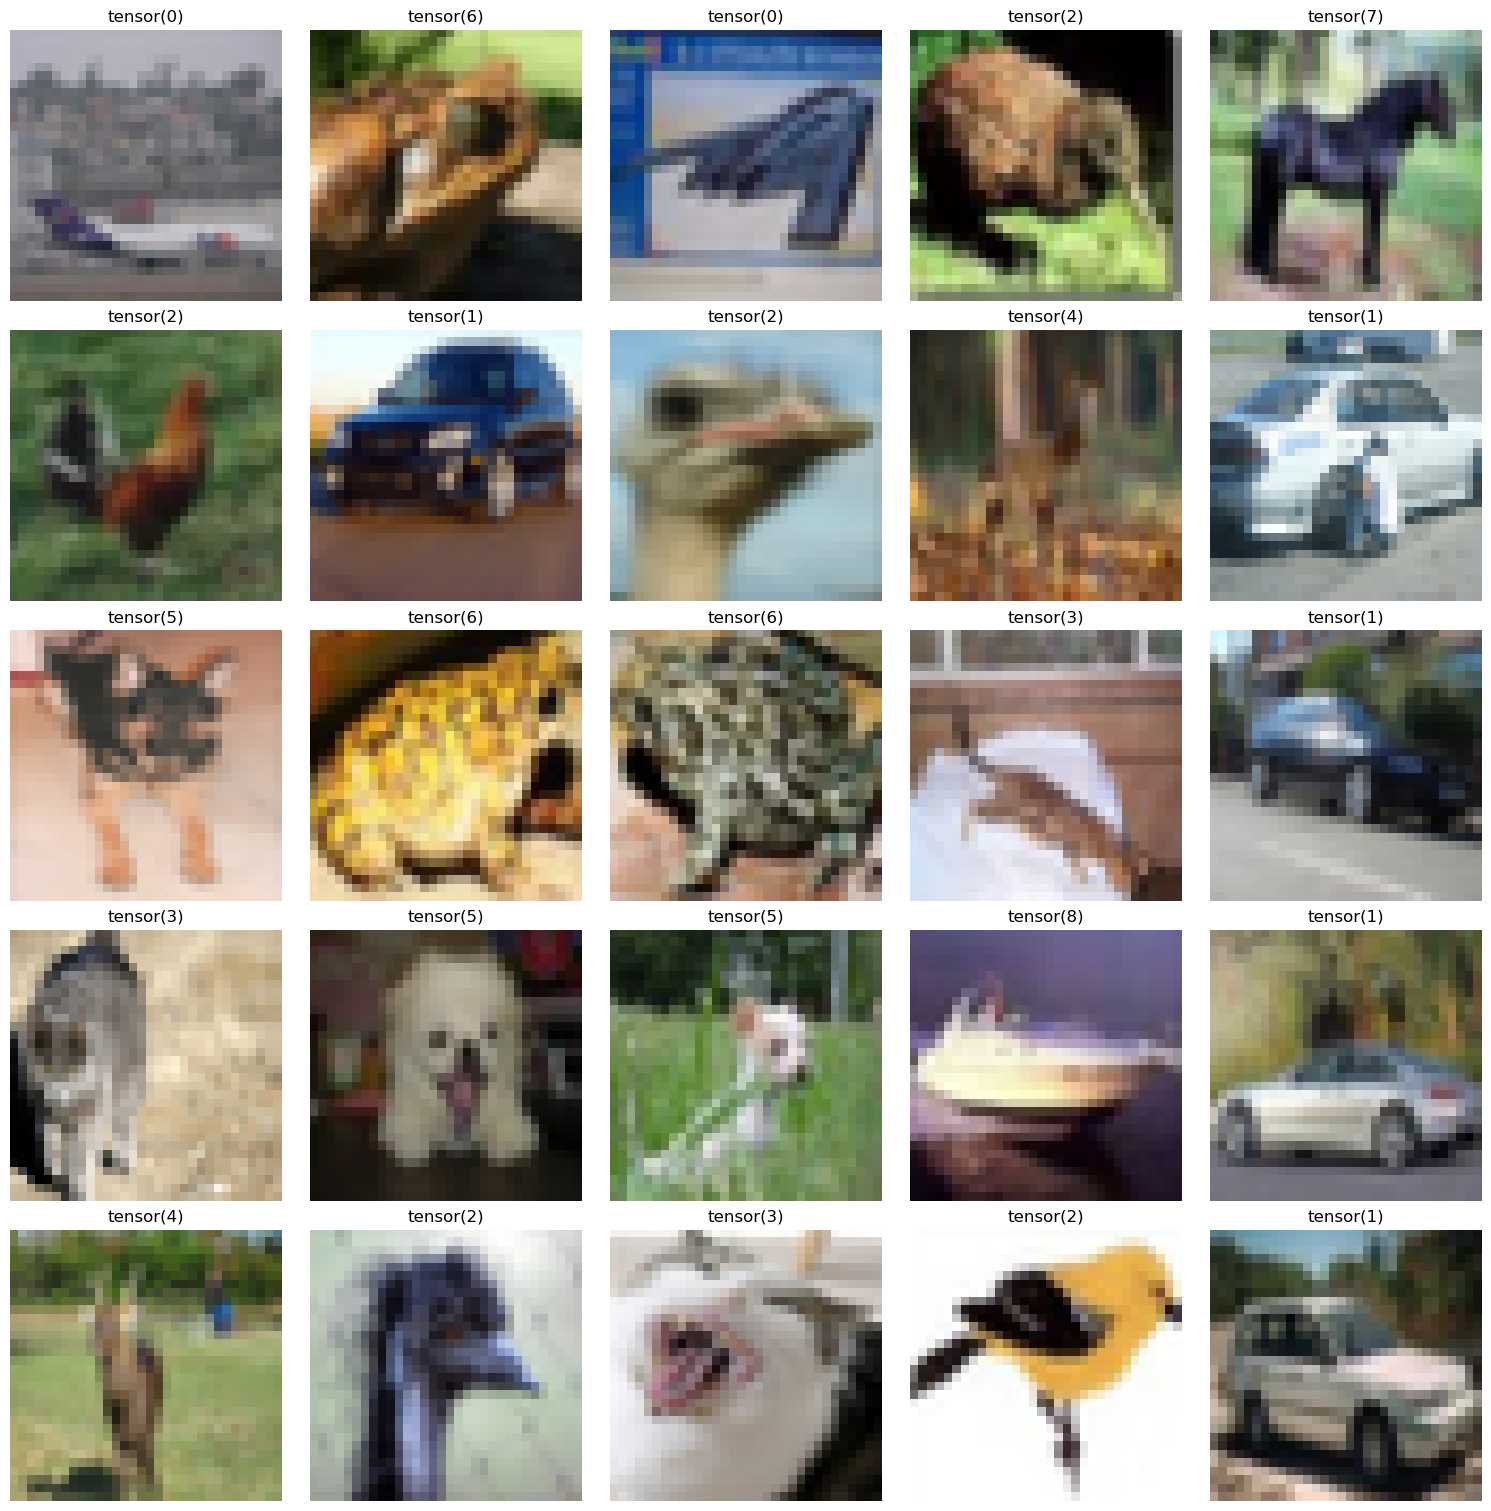

In [10]:
dt = dls.train
xb,yb = next(iter(dt))
show_images(xb[:25]+0.5, titles=[str(o) for o in yb[:25]])